In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [64]:
df = df.iloc[: , 2:]

In [65]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [66]:
df.sample(5)

,Age,EstimatedSalary,Purchased
54,27,58000,0
85,31,118000,1
359,42,54000,0
109,38,80000,0
363,42,79000,0


<h1>whenever we want to do standardization or normalization first we should always do TRAIN TEST SPLIT</h1>

In [67]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop('Purchased' , axis = 1),
                                                      df['Purchased'],
                                                      test_size = 0.3,
                                                      random_state = 0)
x_train.shape , x_test.shape

((280, 2), (120, 2))

<h1>Standard Scaler </h1> <h3>The Standard Scaler is a preprocessing tool in scikit-learn (Python) that standardizes features by removing the mean and scaling to unit variance.
It applies the formula:
z= (x - u) / sigma</h3>



In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set , it will learn the parameters 

scaler.fit(x_train)  # here fit store the mean of age and mean of salary (all columns in x_train) as array

#transform train and test sets

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled
x_test_scaled  

<h2>Here x_train_scaled and x_test_scaled both are of numpy array form so we need top convert it to the DATA FRAMAE</h2>

In [69]:
x_train_scaled = pd.DataFrame(x_test_scaled , columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)
x_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [70]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [71]:
np.round(x_train_scaled.describe())

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,0.0
max,2.0,2.0


<h1>Effect of Scalling</h1>

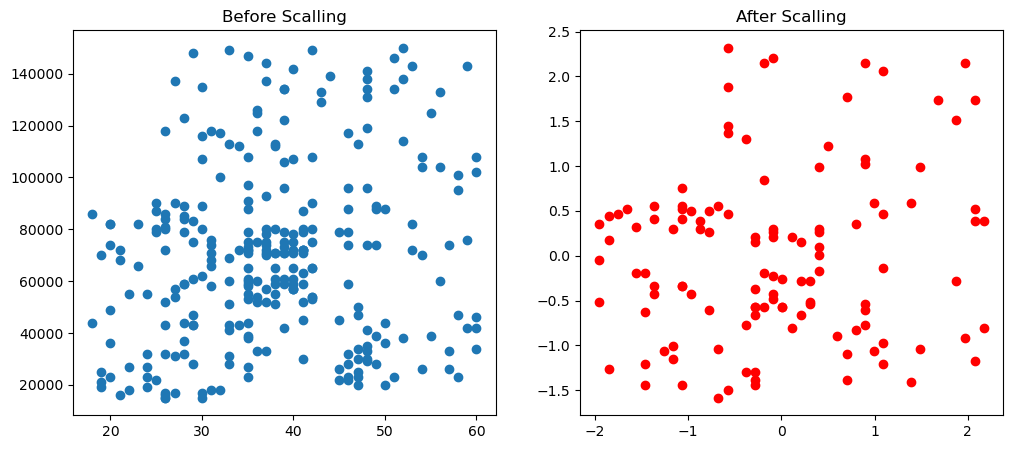

In [72]:
fig,(ax1 , ax2) = plt.subplots(ncols = 2 , figsize= (12,5))

ax1.scatter(x_train['Age'] , x_train['EstimatedSalary'])
ax1.set_title("Before Scalling")
ax2.scatter(x_train_scaled['Age'] , x_train_scaled['EstimatedSalary'] , color = 'red')
ax2.set_title("After Scalling")
plt.show()

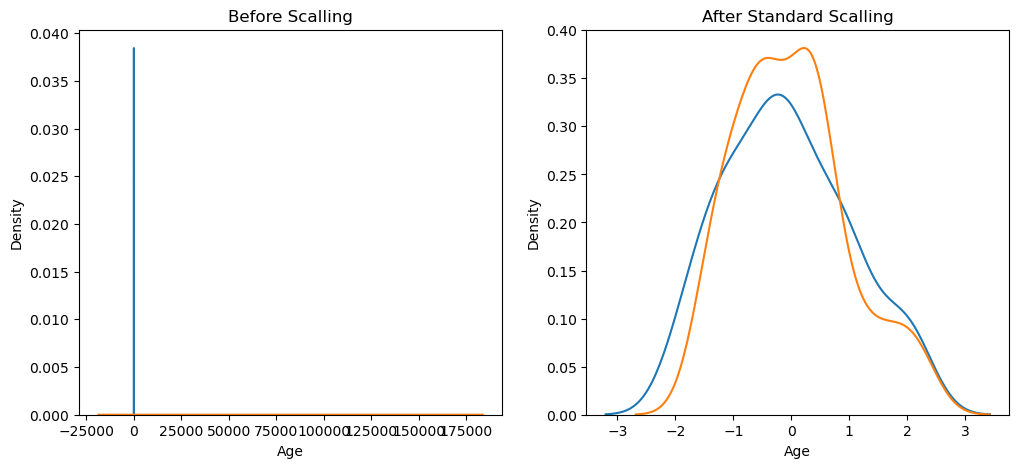

In [73]:
fig,(ax1 , ax2) = plt.subplots(ncols = 2 , figsize= (12,5))

#before scalling
ax1.set_title("Before Scalling")
sns.kdeplot(x_train['Age'] , ax = ax1)
sns.kdeplot(x_train['EstimatedSalary'] , ax= ax1)

#after scalling
ax2.set_title("After Standard Scalling")
sns.kdeplot(x_train_scaled['Age'] , ax = ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'] , ax =ax2)
plt.show()

<h1>Comparisaon Distributions</h1>

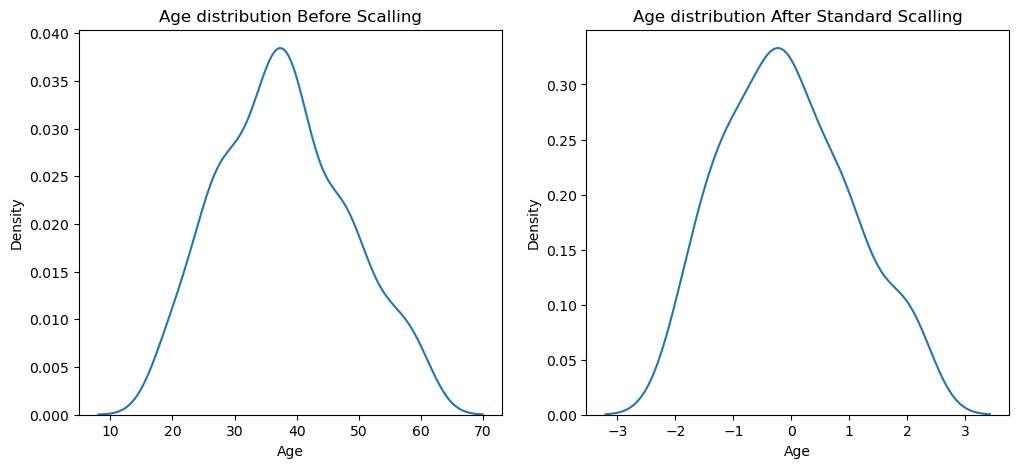

In [74]:
fig,(ax1 , ax2) = plt.subplots(ncols = 2 , figsize= (12,5))

ax1.set_title("Age distribution Before Scalling")
sns.kdeplot(x_train['Age'] , ax = ax1)

ax2.set_title("Age distribution After Standard Scalling")
sns.kdeplot(x_train_scaled['Age'] , ax = ax2)
plt.show()

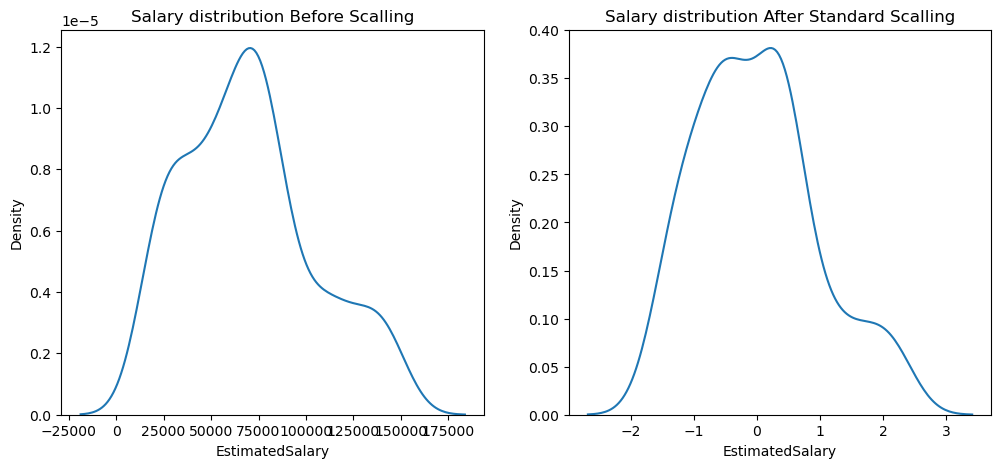

In [75]:
fig,(ax1 , ax2) = plt.subplots(ncols = 2 , figsize= (12,5))

ax1.set_title("Salary distribution Before Scalling")
sns.kdeplot(x_train['EstimatedSalary'] , ax = ax1)

ax2.set_title("Salary distribution After Standard Scalling")
sns.kdeplot(x_train_scaled['EstimatedSalary'] , ax = ax2)
plt.show()

<h1>effect of Outlier </h1>

In [77]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [82]:
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_data], ignore_index=True)

In [83]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


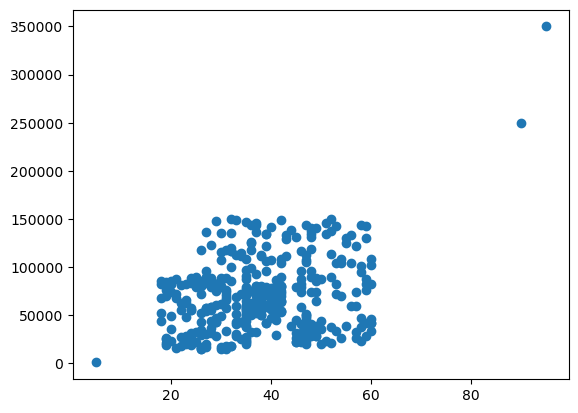

In [84]:
plt.scatter(df['Age'] , df['EstimatedSalary'])

In [85]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop('Purchased' , axis = 1),
                                                      df['Purchased'],
                                                      test_size = 0.3,
                                                      random_state = 0)
x_train.shape , x_test.shape

((282, 2), (121, 2))

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set , it will learn the parameters 

scaler.fit(x_train)  # here fit store the mean of age and mean of salary (all columns in x_train) as array

#transform train and test sets

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [88]:
x_train_scaled = pd.DataFrame(x_test_scaled , columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)

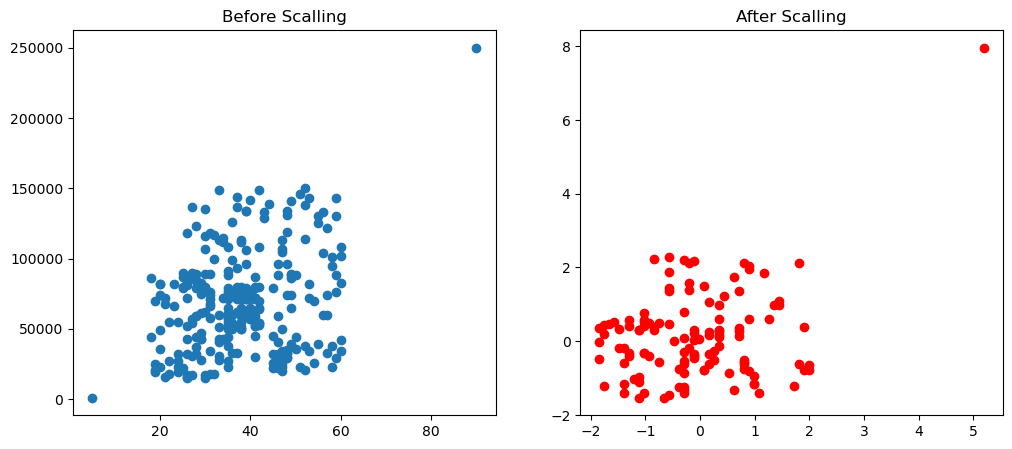

In [89]:
fig,(ax1 , ax2) = plt.subplots(ncols = 2 , figsize= (12,5))

ax1.scatter(x_train['Age'] , x_train['EstimatedSalary'])
ax1.set_title("Before Scalling")
ax2.scatter(x_train_scaled['Age'] , x_train_scaled['EstimatedSalary'] , color = 'red')
ax2.set_title("After Scalling")
plt.show()